## कद्दूको मूल्य निर्धारणका लागि रेखीय र बहुपद प्रतिगमन - पाठ ३

आवश्यक पुस्तकालयहरू र डेटासेट लोड गर्नुहोस्। डेटालाई एउटा डाटाफ्रेममा रूपान्तरण गर्नुहोस् जसमा डेटाको एउटा उपसमूह समावेश छ:

- केवल बुसलद्वारा मूल्य निर्धारण गरिएका कद्दूहरू प्राप्त गर्नुहोस्  
- मिति महिनामा रूपान्तरण गर्नुहोस्  
- उच्च र न्यून मूल्यहरूको औसतको रूपमा मूल्य गणना गर्नुहोस्  
- मूल्यलाई बुसलको मात्राद्वारा मूल्य निर्धारण प्रतिबिम्बित गर्न रूपान्तरण गर्नुहोस्  


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

स्क्याटरप्लटले हामीलाई सम्झाउँछ कि हामीसँग केवल अगस्टदेखि डिसेम्बरसम्मको महिनाको डेटा मात्र छ। रेखीय तरिकामा निष्कर्ष निकाल्न सक्षम हुन हामीलाई सम्भवतः थप डेटा आवश्यक छ।


<AxesSubplot:xlabel='Month', ylabel='Price'>

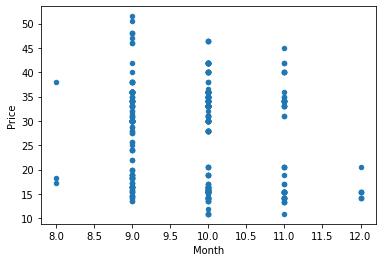

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

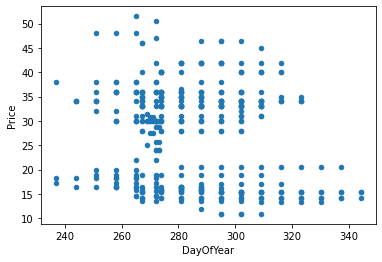

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


जस्तो देखिन्छ सम्बन्ध धेरै सानो छ, तर त्यहाँ केही अन्य महत्वपूर्ण सम्बन्ध छ - किनभने माथिको प्लटमा मूल्य बिन्दुहरूमा धेरै अलग-अलग समूहहरू देखिन्छन्। विभिन्न कद्दूका प्रकारहरू देखाउने प्लट बनाउँ।


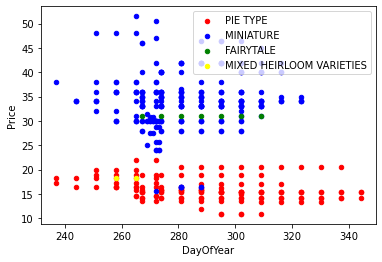

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

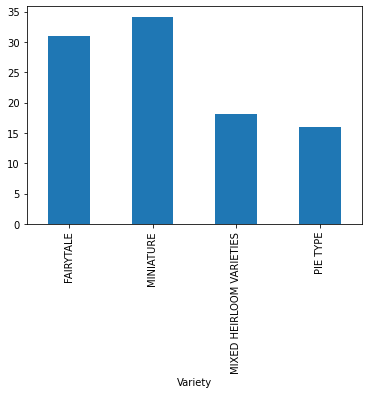

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

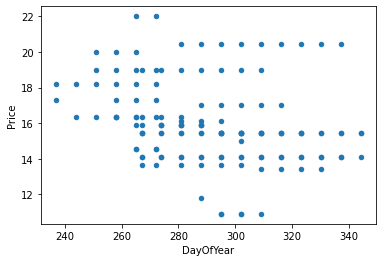

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### रेखीय प्रतिगमन

हामी Scikit Learn प्रयोग गरेर रेखीय प्रतिगमन मोडेल प्रशिक्षण गर्नेछौं:


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


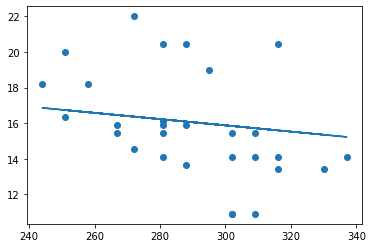

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

रेखाको ढलान रेखीय प्रतिगमन गुणांकबाट निर्धारण गर्न सकिन्छ:


In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### बहुपद रिग्रेशन

कहिलेकाहीं विशेषताहरू र परिणामहरू बीचको सम्बन्ध स्वाभाविक रूपमा गैर-रेखीय हुन्छ। उदाहरणका लागि, फर्सीको मूल्य जाडोमा (महिना=१,२) उच्च हुन सक्छ, त्यसपछि गर्मीमा (महिना=५-७) घट्न सक्छ, र फेरि बढ्न सक्छ। रेखीय रिग्रेशनले यो सम्बन्धलाई सही रूपमा पत्ता लगाउन सक्दैन।

यस अवस्थामा, हामी अतिरिक्त विशेषताहरू थप्ने विचार गर्न सक्छौं। सरल तरिका भनेको इनपुट विशेषताहरूबाट बहुपदहरू प्रयोग गर्नु हो, जसले **बहुपद रिग्रेशन** परिणाम दिन्छ। Scikit Learn मा, हामी पाइपलाइनहरू प्रयोग गरेर स्वचालित रूपमा बहुपद विशेषताहरू पूर्व-गणना गर्न सक्छौं:


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


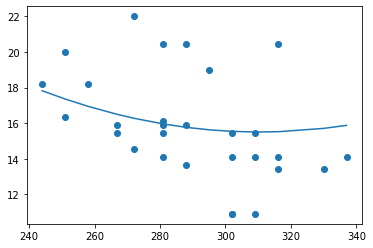

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### विभिन्न प्रकारको एन्कोडिङ

आदर्श संसारमा, हामी एउटै मोडेल प्रयोग गरेर विभिन्न कद्दूका प्रकारहरूको मूल्य भविष्यवाणी गर्न सक्षम हुन चाहन्छौं। प्रकारलाई ध्यानमा राख्नका लागि, हामीले पहिले यसलाई संख्यात्मक रूपमा रूपान्तरण गर्नुपर्छ, वा **एन्कोड** गर्नुपर्छ। यसका लागि केही तरिकाहरू छन्:

* साधारण संख्यात्मक एन्कोडिङ, जसले विभिन्न प्रकारहरूको तालिका बनाउँछ, र त्यसपछि तालिकामा रहेको सूचकांकद्वारा प्रकारको नामलाई प्रतिस्थापन गर्छ। यो रैखिक प्रतिगमन (linear regression) का लागि उत्तम विचार होइन, किनभने रैखिक प्रतिगमनले सूचकांकको संख्यात्मक मानलाई ध्यानमा राख्छ, र संख्यात्मक मान सम्भवतः मूल्यसँग संख्यात्मक रूपमा सम्बन्धित हुँदैन।
* वन-हट एन्कोडिङ (One-hot encoding), जसले `Variety` स्तम्भलाई ४ फरक स्तम्भहरूसँग प्रतिस्थापन गर्छ, प्रत्येक प्रकारका लागि एउटा, जसले १ समावेश गर्छ यदि सम्बन्धित पंक्ति दिइएको प्रकारको हो भने, र अन्यथा ०।

तलको कोडले देखाउँछ कि हामीले कसरी प्रकारलाई वन-हट एन्कोड गर्न सक्छौं:


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### भिन्नतामा आधारित रेखीय पुनरावृत्ति 

अब हामी माथिको जस्तै कोड प्रयोग गर्नेछौं, तर `DayOfYear` को सट्टा हामी हाम्रो एक-हट-एन्कोड गरिएको भिन्नता इनपुटको रूपमा प्रयोग गर्नेछौं:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


हामी अन्य सुविधाहरूलाई पनि उस्तै तरिकाले प्रयोग गर्न प्रयास गर्न सक्छौं, र तिनीहरूलाई संख्यात्मक सुविधाहरू जस्तै `Month` वा `DayOfYear` सँग संयोजन गर्न सक्छौं:


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### बहुपद रिग्रेशन

बहुपद रिग्रेशन एक-हट-एन्कोड गरिएको श्रेणीगत विशेषताहरूसँग पनि प्रयोग गर्न सकिन्छ। बहुपद रिग्रेशनलाई प्रशिक्षण दिनको लागि कोड मूलतः माथि देखिएको जस्तै हुनेछ।


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**अस्वीकरण**:  
यो दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) प्रयोग गरेर अनुवाद गरिएको छ। हामी शुद्धताको लागि प्रयास गर्छौं, तर कृपया ध्यान दिनुहोस् कि स्वचालित अनुवादहरूमा त्रुटि वा अशुद्धता हुन सक्छ। यसको मूल भाषा मा रहेको मूल दस्तावेज़लाई आधिकारिक स्रोत मानिनुपर्छ। महत्वपूर्ण जानकारीको लागि, व्यावसायिक मानव अनुवाद सिफारिस गरिन्छ। यस अनुवादको प्रयोगबाट उत्पन्न हुने कुनै पनि गलतफहमी वा गलत व्याख्याको लागि हामी जिम्मेवार हुने छैनौं।
